Model Training

1.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [791]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the CSV Data as Pandas DataFrame


In [792]:
df=pd.read_csv('data/stud.csv')

Show Top 5 Records


In [793]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables


In [794]:
X=pd.DataFrame(df)
X=df.drop(columns=('math_score'),axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [795]:

for i ,col in enumerate(X.select_dtypes(include=['object']).columns):
    print(f"Categories in '{col}' variable:    {df[col].unique()}")
dim=[]
for i ,col in enumerate(X.select_dtypes(include=['object']).columns):
    dim.append(len(df[col].unique()))
print( " number of unique values in every category ")
dim=dim+[1,1]
dim

Categories in 'gender' variable:    ['female' 'male']
Categories in 'race_ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:    ['none' 'completed']
 number of unique values in every category 


[2, 5, 6, 2, 2, 1, 1]

In [796]:
y=df['math_score']

In [797]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

Let's understand StandardScaler
class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)[source]

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

In [798]:
# Create Column Transformer with 3 types of transformers
num_features = df['reading_score'].values.reshape(-1,1)
#reshape('rows,columns)

from sklearn.discriminant_analysis import StandardScaler

numeric_transformer = StandardScaler()
print(numeric_transformer.fit(num_features)) #it returns the fitted transformer itself.Fits the transformer to num_features.Prints the transformer with its learned parameters
print(numeric_transformer.mean_)
print(numeric_transformer.scale_)
#standscaler( x-u)/s

print(numeric_transformer.transform(num_features))
print(numeric_transformer.inverse_transform(np.array([[0.19399858], [1.42747598]])))




StandardScaler()
[69.169]
[14.59289002]
[[ 0.19399858]
 [ 1.42747598]
 [ 1.77010859]
 [-0.83389925]
 [ 0.60515772]
 [ 0.94779033]
 [ 1.77010859]
 [-1.79327056]
 [-0.35421359]
 [-0.62831968]
 [-1.03947881]
 [-1.17653186]
 [ 0.81073728]
 [ 0.19399858]
 [-1.10800534]
 [ 0.39957815]
 [ 1.35894946]
 [-2.5470623 ]
 [-1.86179708]
 [-0.76537273]
 [-0.01158098]
 [ 0.39957815]
 [-1.03947881]
 [ 0.26252511]
 [ 0.12547206]
 [ 0.33105163]
 [-1.03947881]
 [-0.01158098]
 [ 0.05694554]
 [ 0.05694554]
 [ 0.33105163]
 [-0.28568707]
 [ 0.19399858]
 [-1.86179708]
 [ 1.22189642]
 [ 0.81073728]
 [ 0.81073728]
 [-0.35421359]
 [ 1.42747598]
 [-0.90242577]
 [-0.55979316]
 [ 0.26252511]
 [-0.76537273]
 [-0.28568707]
 [-0.90242577]
 [-1.03947881]
 [-0.28568707]
 [ 0.12547206]
 [ 0.33105163]
 [ 1.01631685]
 [-0.97095229]
 [-0.01158098]
 [-1.72474403]
 [ 0.60515772]
 [ 1.01631685]
 [-1.9303236 ]
 [ 1.08484337]
 [-0.97095229]
 [-0.6968462 ]
 [-3.57496013]
 [ 0.33105163]
 [-2.06737664]
 [-0.55979316]
 [ 0.74221076]


OneHotEncoder

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. This creates a binary column for each category and returns a sparse matrix or dense array (depending on the sparse_output parameter).

One-hot encoding is for categorical data because it transforms categories into binary vectors without losing information.

Numerical data already has meaningful values, so one-hot encoding would destroy important relationships (e.g., order, magnitude) and lead to inefficient, high-dimensional data.


In [799]:
from sklearn.preprocessing import OneHotEncoder

num_features = df.select_dtypes(include="object").columns
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[num_features])
enc.categories_
p=enc.transform(df[num_features]).toarray()

print(enc.transform(df[num_features]).toarray().tolist())
print(enc.inverse_transform([[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0], [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0]]))
print(enc.inverse_transform([[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]]))
enc.get_feature_names_out(['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course'])

[[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0], [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0], [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0], [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0], [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0], [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0], [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0], [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0], [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0], [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0], [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0

array(['gender_female', 'gender_male', 'race_ethnicity_group A',
       'race_ethnicity_group B', 'race_ethnicity_group C',
       'race_ethnicity_group D', 'race_ethnicity_group E',
       "parental_level_of_education_associate's degree",
       "parental_level_of_education_bachelor's degree",
       'parental_level_of_education_high school',
       "parental_level_of_education_master's degree",
       'parental_level_of_education_some college',
       'parental_level_of_education_some high school',
       'lunch_free/reduced', 'lunch_standard',
       'test_preparation_course_completed',
       'test_preparation_course_none'], dtype=object)

lets go back to the tuto

In [800]:
from sklearn.compose import ColumnTransformer
import csv


num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)
X_transformed = numeric_transformer.fit_transform(df[num_features])
print('StandardScaler')
print(numeric_transformer.mean_)
print(numeric_transformer.scale_)


oh_transformer.fit(df[cat_features])
oh_transformer.categories_
p=oh_transformer.transform(df[cat_features]).toarray()
print('oh_transformer')
print(oh_transformer.transform(df[cat_features]).toarray())
print(oh_transformer.inverse_transform(oh_transformer.transform(df[cat_features]).toarray()))

X_transformed = preprocessor.fit_transform(X)
oh_columns = oh_transformer.get_feature_names_out(cat_features)

csv_data = []

print("Transformation Table:")
print("-" * 50)

header = []

for col in X.select_dtypes(include=['object']).columns:
    header.append(f"{col}, {df[col].unique()}")  


header.extend(num_features)

csv_data.append(header)


print(" | ".join(header))

for i, row in enumerate(X_transformed):
    oh_arrays = []
    for cat_feature in cat_features:
        cat_indices = [i for i, col in enumerate(oh_columns) if col.startswith(cat_feature)]
        oh_array = row[cat_indices]
        oh_arrays.append(str(oh_array))
    
    numerical_values = [str(row[len(oh_columns) + j]) for j, _ in enumerate(num_features)]
    
    csv_data.append(oh_arrays + numerical_values)

    print(" | ".join(oh_arrays + numerical_values))

print("-" * 50)
output_file = "transformed_data.csv"
with open(output_file, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(csv_data)

print(f"Transformed data saved to {output_file}")




StandardScaler
[69.169 68.054]
[14.59289002 15.18805728]
oh_transformer
[[1. 0. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 0. 1.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]
[['female' 'group B' "bachelor's degree" 'standard' 'none']
 ['female' 'group C' 'some college' 'standard' 'completed']
 ['female' 'group B' "master's degree" 'standard' 'none']
 ...
 ['female' 'group C' 'high school' 'free/reduced' 'completed']
 ['female' 'group D' 'some college' 'standard' 'completed']
 ['female' 'group D' 'some college' 'free/reduced' 'none']]
Transformation Table:
--------------------------------------------------
gender, ['female' 'male'] | race_ethnicity, ['group B' 'group C' 'group A' 'group D' 'group E'] | parental_level_of_education, ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] | lunch, ['standard' 'free/reduced'] | test_preparation_course, ['none' 'completed'] | reading_s

In [801]:
print(X_transformed.shape)#19  is the number of all elements in teh arrays 
print(X.shape)#number of columns


(1000, 19)
(1000, 7)


In [802]:
X=preprocessor.fit_transform(X)
X.shape

(1000, 19)

Let's extract the first 5 values transformed !!

In [803]:
X1=pd.DataFrame(X)
X1.head(5).values.tolist()

[[1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.19399858403803502,
  0.3914918076496706],
 [1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.4274759816659497,
  1.3132686840532009],
 [1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  1.7701085921181483,
  1.6424747113401759],
 [0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  -0.8338992473185606,
  -1.5837443560721798],
 [0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.6051577165806732,
  0.45733301310706564]]

Training and Testing 

In [804]:

# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(800, 19) (200, 19)
(800,) (200,)


Create an Evaluate Function to give all metrics after model Training


The function evaluate_model you've written is a utility function to evaluate the performance of a regression model. It calculates four common evaluation metrics:

Mean Absolute Error (MAE)

Mean Squared Error (MSE)

Root Mean Squared Error (RMSE)

R-squared (R²)

MAE: Gives a straightforward measure of average error.

MSE:The average squared difference between the true values and the predicted values.
Lower values are better.
MSE penalizes larger errors more heavily than smaller errors (due to squaring).

RMSE: Emphasizes larger errors, which is useful when large errors are particularly undesirable.

R²: Provides insight into how well the model explains the variance in the data.


![alt text](image-1.png)


![alt text][def]

[def]: image-2.png

In [805]:
def evaluate_model(y_true, predicted):
    mae = mean_absolute_error(y_true, predicted)
    mse = mean_squared_error(y_true, predicted)
    rmse = np.sqrt(mean_squared_error(y_true, predicted))
    r2_square = r2_score(y_true, predicted)
    return mae, rmse, r2_square

In [806]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}


let's evaluate each of themodels

1. Predicting with X_train

y_train_pred = model.predict(X_train)


Purpose: This generates predictions for the training data (the data the model was trained on).

Use Case:

To evaluate how well the model fits the training data.

To check for overfitting (if the model performs extremely well on the training data but poorly on unseen data).

Example Metrics:

Training accuracy, training mean squared error (MSE), etc.

2. Predicting with X_test

y_test_pred = model.predict(X_test)

Purpose: This generates predictions for the test data (unseen data that the model was not trained on).

Use Case:

To evaluate how well the model generalizes to new, unseen data.

To estimate the model's performance in real-world scenarios.

Example Metrics:

Test accuracy, test mean squared error (MSE), etc.

Interpreting Results
If Training MSE is much lower than Test MSE, the model is likely overfitting.

If both Training MSE and Test MSE are high, the model is likely underfitting.

Ideally, you want both metrics to be low and close to each other, indicating good generalization.

In summary:

Use X_train to check how well the model fits the training data.

Use X_test to check how well the model generalizes to new data.

Both are essential for diagnosing and improving your model.

When to Predict for the Whole Dataset
After Model Evaluation: Only predict for the whole dataset after you've evaluated the model on the test set and are confident in its performance.

Deployment: If you're deploying the model and need predictions for all available data.

Visualization: If you want to visualize the model's predictions across the entire dataset (e.g., plotting a regression line).

Ensure that the model is trained only on the training data (X_train, y_train) and evaluated on the test data (X_test, y_test) before predicting on the whole dataset.

Never use the test data (X_test) during training.

In [807]:
model_list = []
r2_list =[]
for i in range(len(list(models))):

    model = list(models.values())[i]    
    model.fit(X_train, y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    model_train_mae , model_train_rmse , model_train_r2 = evaluate_model(y_train , y_train_pred)
    model_test_mae , model_test_rmse , model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model performance for training')
    print('Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('Mean Abdolute Error: {:.4f}' .format(model_train_mae))
    print('R2 Score: {: .4f}'.format(model_train_r2))

    print('-'*35)

    print('Model performance for testing')
    print('Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('Mean Abdolute Error: {:.4f}' .format(model_test_mae))
    print('R2 Score: {: .4f}'.format(model_test_r2))

    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for training
Root Mean Squared Error: 5.3274
Mean Abdolute Error: 4.2788
R2 Score:  0.8741
-----------------------------------
Model performance for testing
Root Mean Squared Error: 5.4096
Mean Abdolute Error: 4.2259
R2 Score:  0.8797


Lasso
Model performance for training
Root Mean Squared Error: 6.5938
Mean Abdolute Error: 5.2063
R2 Score:  0.8071
-----------------------------------
Model performance for testing
Root Mean Squared Error: 6.5197
Mean Abdolute Error: 5.1579
R2 Score:  0.8253


Ridge
Model performance for training
Root Mean Squared Error: 5.3233
Mean Abdolute Error: 4.2650
R2 Score:  0.8743
-----------------------------------
Model performance for testing
Root Mean Squared Error: 5.3904
Mean Abdolute Error: 4.2111
R2 Score:  0.8806


K-Neighbors Regressor
Model performance for training
Root Mean Squared Error: 5.7122
Mean Abdolute Error: 4.5187
R2 Score:  0.8553
-----------------------------------
Model performance for testing
Root Mea

In [808]:
y_test

521    91
737    53
740    80
660    74
411    84
       ..
408    52
332    62
208    74
613    65
78     61
Name: math_score, Length: 200, dtype: int64

Results

In [809]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.879740
7,AdaBoost Regressor,0.854644
6,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783898
4,Decision Tree,0.737053


Linear Regression

In [810]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train, y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print('Acuraccy of the model is %.2f' %score)


Acuraccy of the model is 87.97


Plot y_pred and y_test


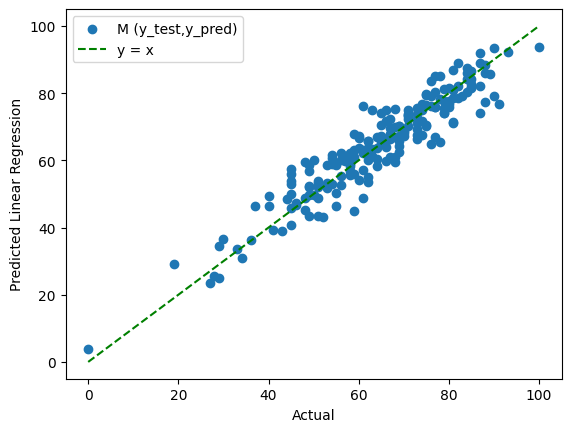

In [811]:

plt.scatter(y_test,y_pred,label='M (y_test,y_pred)')
plt.xlabel('Actual')
plt.ylabel('Predicted Linear Regression')
plt.plot([0,100],[0,100],color='green', linestyle='--', label='y = x')
plt.legend(loc='upper left')

plt.show()

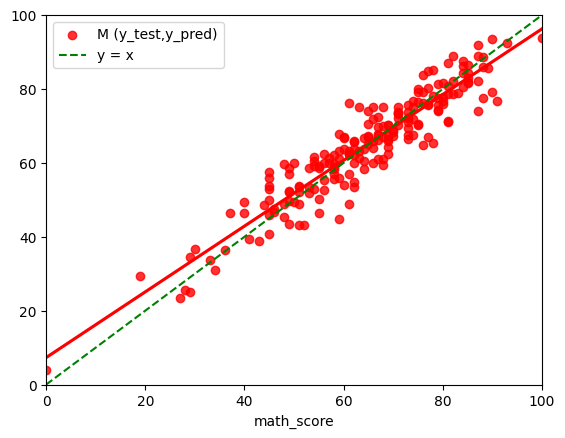

In [812]:
sns.regplot(x=y_test, y=y_pred ,ci=None, color='red',label='M (y_test,y_pred)')
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,100],color='green', linestyle='--', label='y = x')
plt.legend(loc='upper left')
plt.show()

#in the context of a regression model, the confidence interval gives you an estimate of the uncertainty or variability around the regression line, showing where the true regression line might lie, based on the sample data.


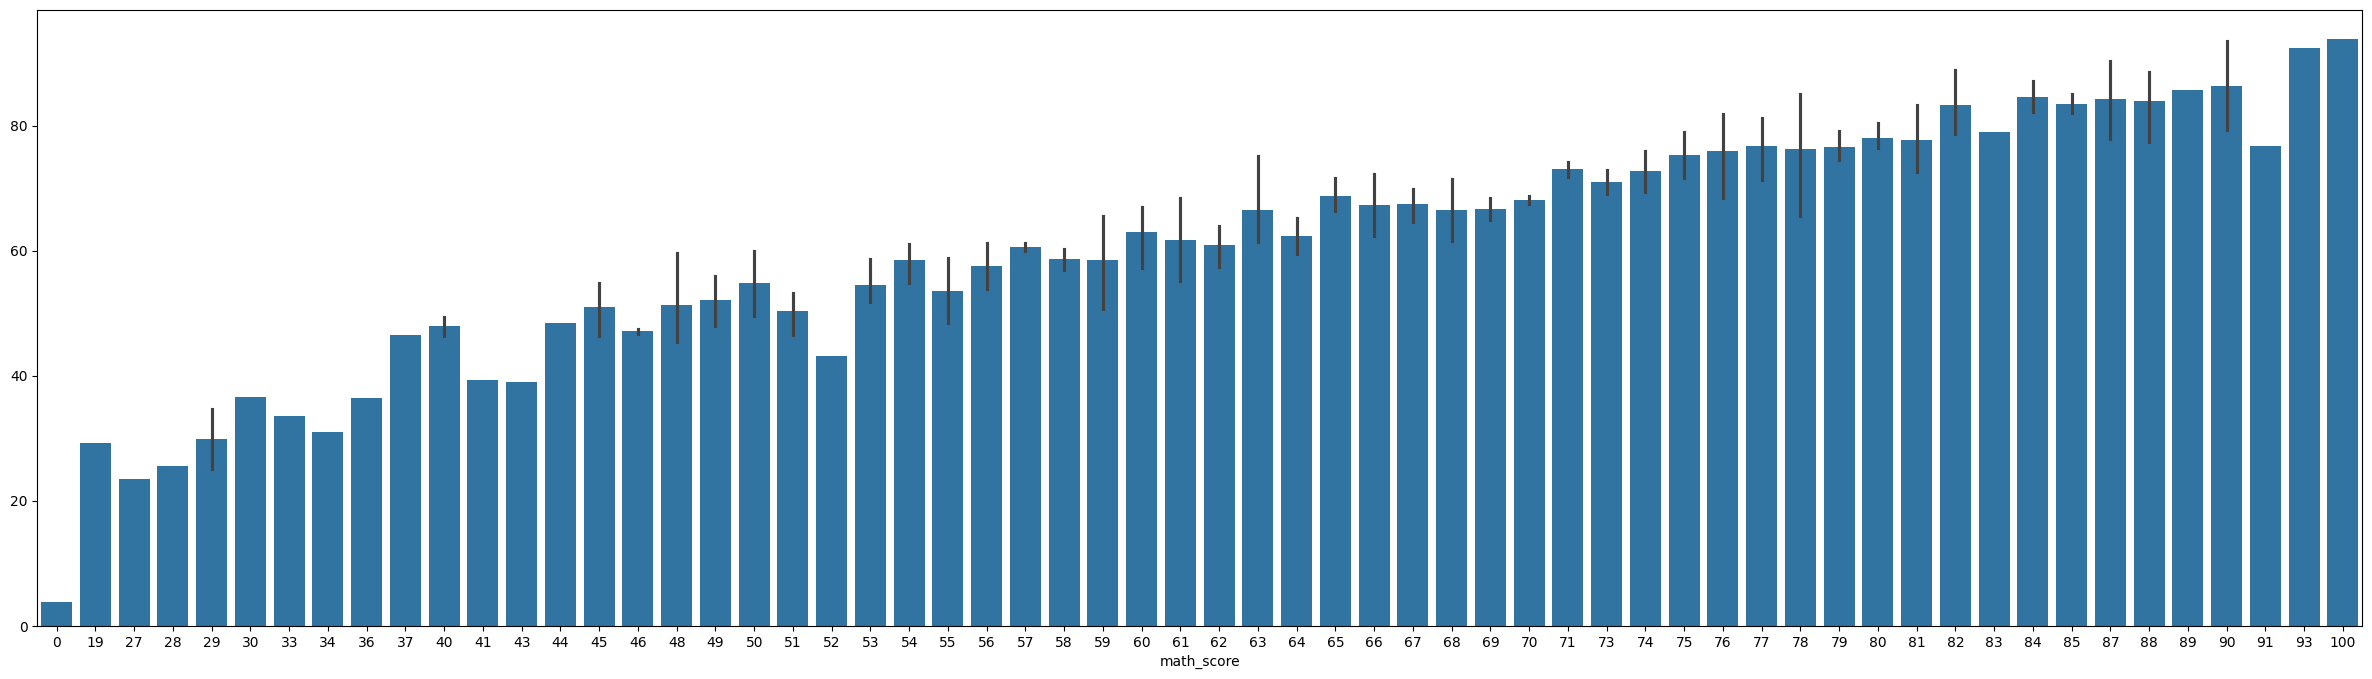

In [813]:
f,ax=plt.subplots(1,1, figsize=(30,8))
sns.barplot(x=y_test,y=y_pred)
plt.show()


Difference between The predicted value and the actual value ( Linear Regression)

In [814]:
pred_df=pd.DataFrame({'Actaul Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actaul Value,Predicted Value,Difference
521,91,76.703125,14.296875
737,53,58.578125,-5.578125
740,80,76.828125,3.171875
660,74,76.734375,-2.734375
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.125000,8.875000
332,62,62.109375,-0.109375
208,74,67.562500,6.437500
613,65,67.328125,-2.328125


Other models

In [815]:
lin_model=DecisionTreeRegressor()
lin_model=lin_model.fit(X_train, y_train)
y_pred1=lin_model.predict(X_test)
score=r2_score(y_test,y_pred1)*100
print('Acuraccy of the model is %.2f' %score)

Acuraccy of the model is 75.96


In [816]:
lin_model=Ridge()
lin_model=lin_model.fit(X_train, y_train)
y_pred2=lin_model.predict(X_test)
score=r2_score(y_test,y_pred2)*100
print('Acuraccy of the model is %.2f' %score)

Acuraccy of the model is 88.06


<Axes: >

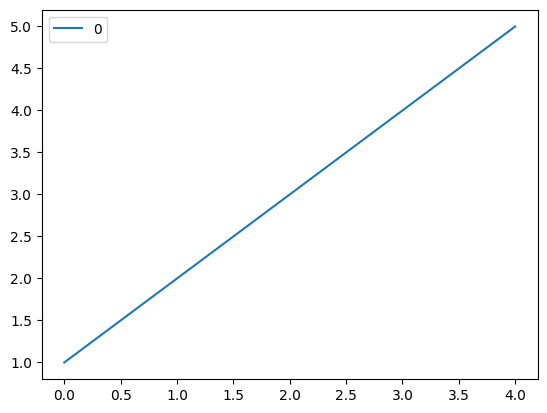

In [817]:

pd.DataFrame(list([1,2,3,4,5])).plot()

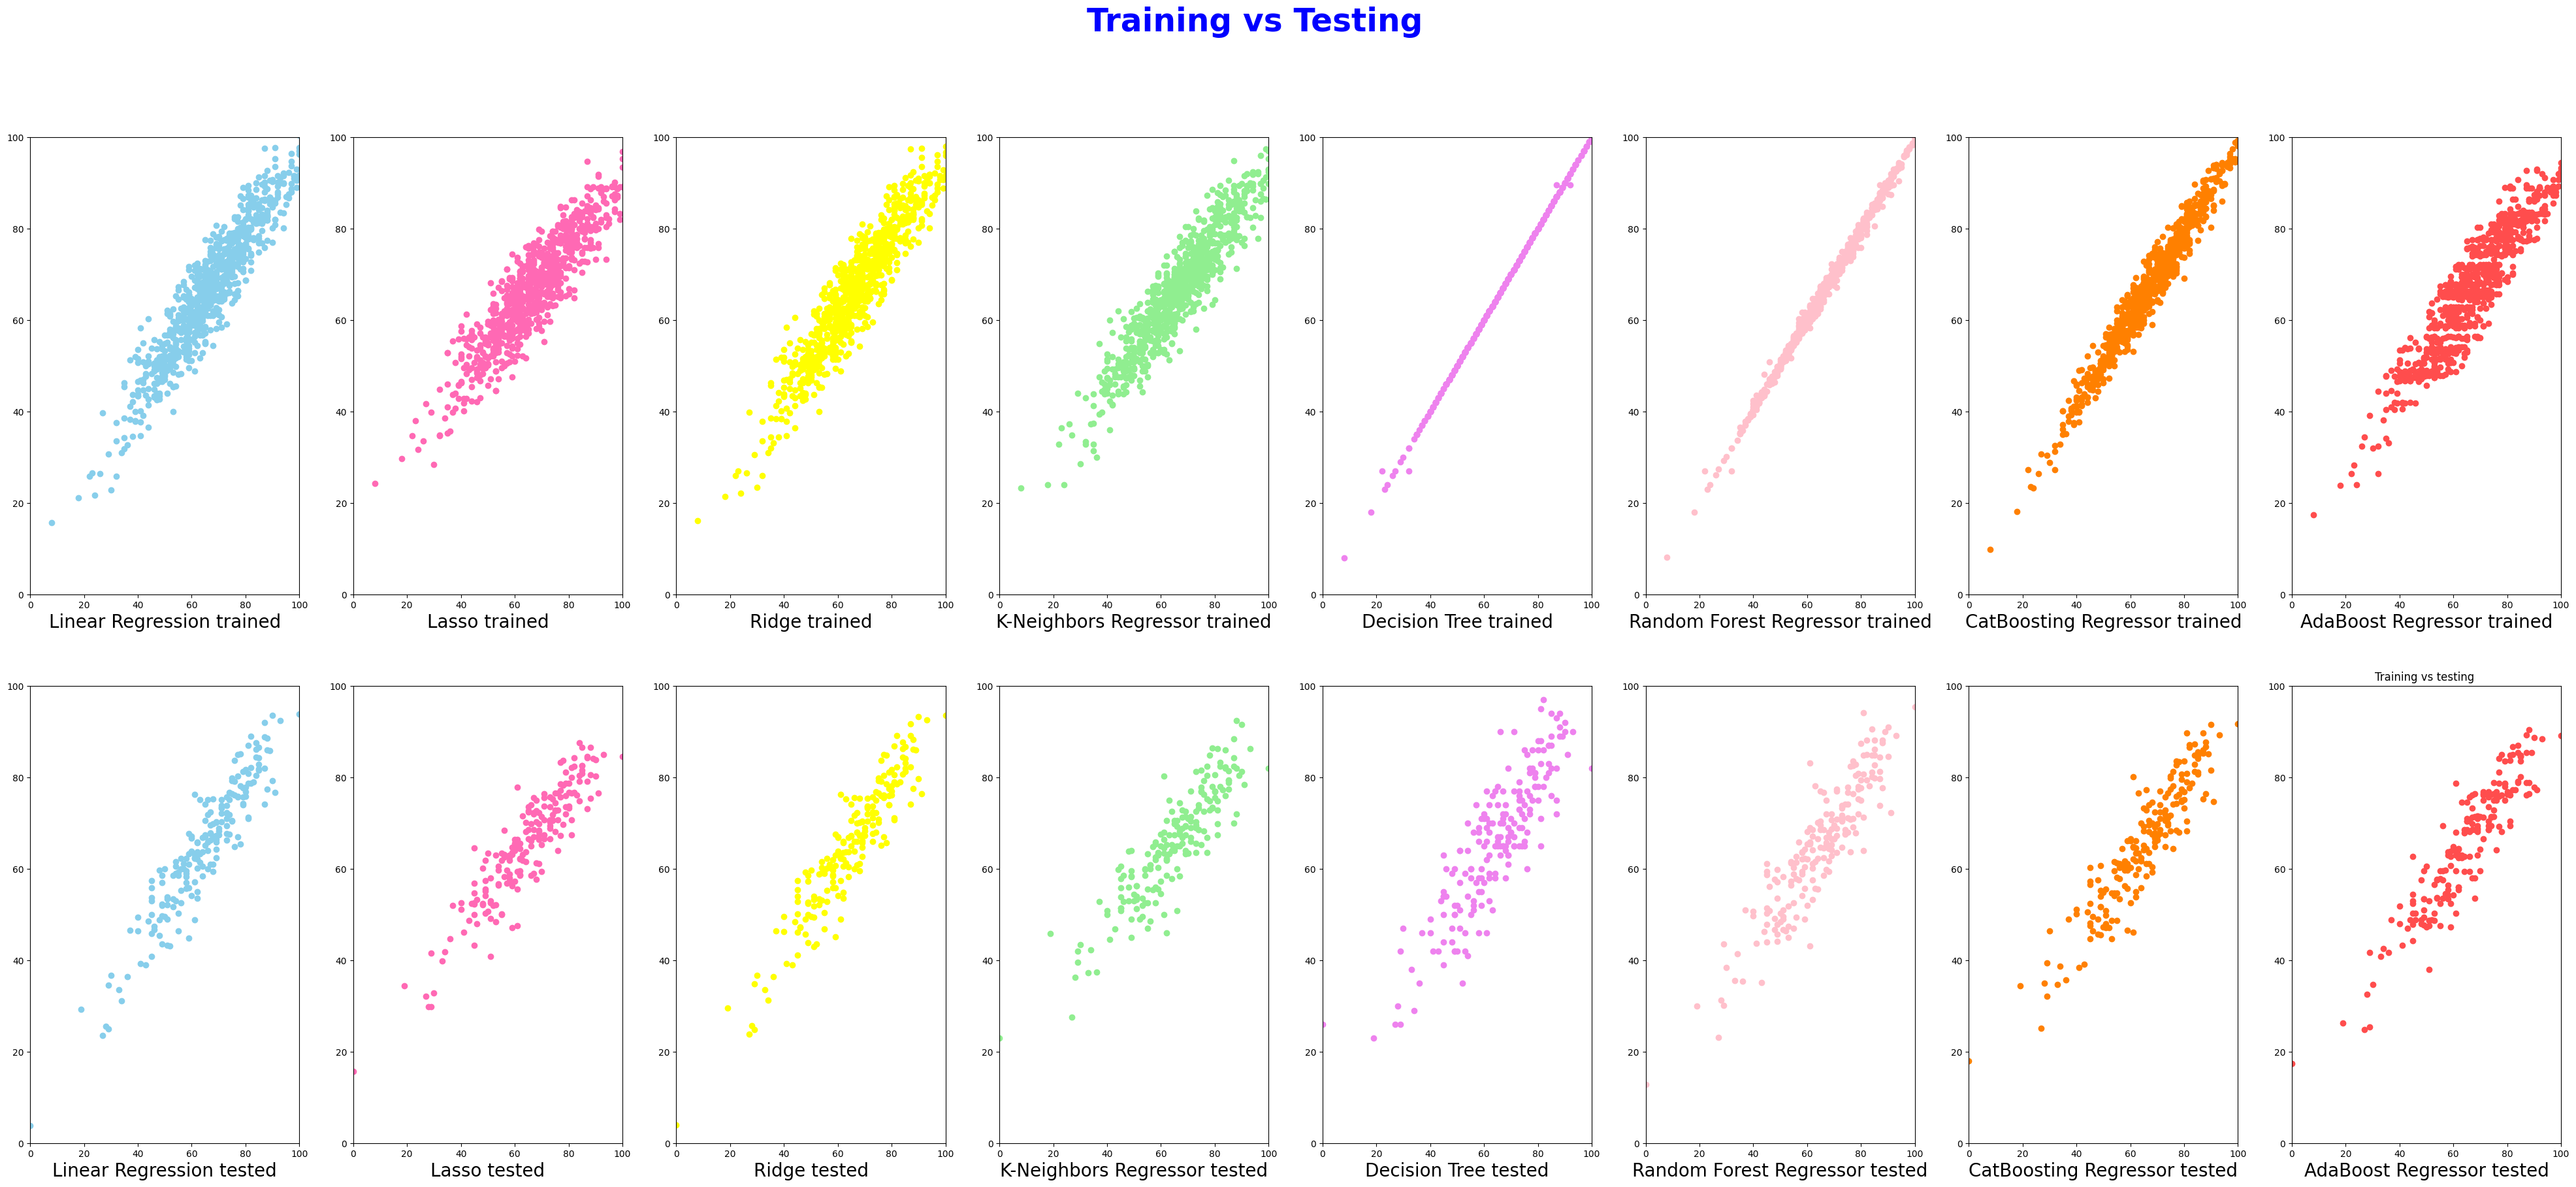

In [818]:
f,ax=plt.subplots(2,len(list(models)), figsize=(50,20))
p=['skyblue','hotpink','yellow','lightgreen','violet','pink','#ff8000','#ff4d4d']
plt.suptitle("Training vs Testing",fontsize=35, fontweight='bold',color='blue')
for i in range(len(list(models))):

    model = list(models.values())[i]    
    model.fit(X_train, y_train)

    y_train_pred=model.predict(X_train)
    plt.subplot(2,len(list(models)),i+1)
    plt.xlim(0, 100)  
    plt.ylim(0, 100) 
    plt.xlabel(list(models.keys())[i]+" trained",fontweight = 30, fontsize = 20)
    plt.scatter(y_train, y_train_pred,color=p[i])
    plt.subplot(2,len(list(models)),i+1)



    model = list(models.values())[i]    
    model.fit(X_train, y_train)


    y_test_pred=model.predict(X_test)
    plt.subplot(2,len(list(models)),len(list(models))+i+1)
    plt.xlim(0, 100)  
    plt.ylim(0, 100) 
    plt.xlabel(list(models.keys())[i] +" tested",fontweight = 30, fontsize = 20)
    plt.scatter(y_test, y_test_pred,color=p[i])

plt.title('Training vs testing ')

plt.show()

Let's create a file with all the predictions using different models 

In [819]:


columnss=['math_score_true',"test vs train"]
for i , model in enumerate(list(models.keys())):
    p="prediction using " + model 
    columnss.append(p)


df=pd.DataFrame(columns=columnss)

df.iloc[:,0]=y
df.iloc[:,1]=np.where(df.index.isin(y_test.index) ,"Test","Train")
for i, model in enumerate(list(models.values())):
    model.fit(X_train,y_train)
    df.iloc[:,i+2]=model.predict(X)
    


df.to_csv('data/predictions.csv',index=False)  


df.head()   

,math_score_true,test vs train,prediction using Linear Regression,prediction using Lasso,prediction using Ridge,prediction using K-Neighbors Regressor,prediction using Decision Tree,prediction using Random Forest Regressor,prediction using CatBoosting Regressor,prediction using AdaBoost Regressor
0,72,Train,66.078125,66.418629,66.115556,66.2,72.0,71.255913,68.006756,65.336283
1,69,Train,78.15625,79.855299,77.991233,80.4,69.0,69.98288,74.349605,81.234286
2,90,Train,84.734375,84.067348,84.640521,85.2,90.0,89.849106,88.11558,87.030303
3,47,Train,50.6875,54.504385,50.869733,53.8,47.0,46.694096,47.688224,49.619718
4,76,Train,82.140625,77.024448,82.006276,77.8,76.0,77.92907,80.059385,77.70438


Let's debug the linear regression and see the coefficients  and add them to the transformation file 

In [820]:
class DebugLinearRegression(LinearRegression):
    def fit(self, X, y):
        print("Starting training...")
        print("Input data (X):", X)
        print("Target data (y):", y)
        super().fit(X, y)  # Call the original fit method
        print("Training complete. Coefficients:", self.coef_)
        print("Intercept:", self.intercept_)
        self.coefficient = self.coef_
        self.intercept=self.intercept_

model = DebugLinearRegression()
model.fit(X_train, y_train)
model.predict(X)
df=pd.read_csv('data/stud-Copy1.csv')
df['math_score_predicted_linear_regression']=model.predict(X)
df.to_csv('data/stud-Copy1.csv', index=False)
coefficients = model.coefficient
intercept=model.intercept
start = 0
ar = []
ar.extend(['Coefficients','of','the','linear','regression','intercept', model.intercept ])
arr=[]
for length in dim:
    end = start + length
    sublist = coefficients[start:end]
    arr.append("    &   ".join(map(str,sublist))) 

    start=end

print('-'*50)
print(ar)
with open(output_file, mode="a", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(ar)
    writer.writerow(arr)



Starting training...
Input data (X): [[ 1.          0.          0.         ...  1.          0.05694554
   0.45733301]
 [ 1.          0.          0.         ...  0.          0.94779033
   0.98406266]
 [ 1.          0.          0.         ...  1.          1.35894946
   1.18158627]
 ...
 [ 1.          0.          0.         ...  1.         -0.49126664
  -0.99117351]
 [ 0.          1.          0.         ...  0.         -1.45063795
  -0.99117351]
 [ 1.          0.          0.         ...  1.          1.4960025
   1.37910989]]
Target data (y): 29     62
535    66
695    79
557    61
836    73
       ..
106    87
270    69
860    53
435    50
102    85
Name: math_score, Length: 800, dtype: int64
Training complete. Coefficients: [ 4.05469018e+13  4.05469018e+13 -1.26863427e+14 -1.26863427e+14
 -1.26863427e+14 -1.26863427e+14 -1.26863427e+14 -2.68855368e+12
 -2.68855368e+12 -2.68855368e+12 -2.68855368e+12 -2.68855368e+12
 -2.68855368e+12  9.33695665e+13  9.33695665e+13  7.11685952e+13
  7.1168

Let's use the coefficents and the intercept 

In [823]:
coefficients

array([ 4.05469018e+13,  4.05469018e+13, -1.26863427e+14, -1.26863427e+14,
       -1.26863427e+14, -1.26863427e+14, -1.26863427e+14, -2.68855368e+12,
       -2.68855368e+12, -2.68855368e+12, -2.68855368e+12, -2.68855368e+12,
       -2.68855368e+12,  9.33695665e+13,  9.33695665e+13,  7.11685952e+13,
        7.11685952e+13,  3.37500000e+00,  1.10742188e+01])

In [824]:
intercept

-75533082426969.48

Linear Regression Formula :
y= X⋅β+ Intercept


In [832]:
X[0]

array([1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.19399858, 0.39149181])

In [834]:
sum=0
for i in coefficients *  [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.19399858403803502, 0.3914918076496706]:
    sum= i+sum
sum=sum+ intercept
print(sum)

66.078125


In [833]:
sum=0
for i in coefficients *  X[0]:
    sum= i+sum
sum=sum+ intercept
print(sum)

66.078125


Let's predict the first five lines using the transformed values of these lines 

In [822]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict([
   
 [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.19399858403803502, 0.3914918076496706],  
 [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.4274759816659497, 1.3132686840532009],  
 [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.7701085921181483, 1.6424747113401759],  
 [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, -0.8338992473185606, -1.5837443560721798],  
 [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.6051577165806732, 0.45733301310706564]  

]) 
print('prediction des 5 premieres lignes vs les vraies valeures et la difference entre la prediction et la vrai valeure ')
print(y_pred )
print(y.head(5).tolist())
print(y_pred-y.head(5).tolist())

prediction des 5 premieres lignes vs les vraies valeures et la difference entre la prediction et la vrai valeure 
[66.078125 78.15625  84.734375 50.6875   82.140625]
[72, 69, 90, 47, 76]
[-5.921875  9.15625  -5.265625  3.6875    6.140625]
